# 0. IMPORT

In [1]:
import pandas as pd
import numpy as np
import math
import datetime
import json
import requests
import re
import itertools
import re
import ast
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
import collections as co

import time
from datetime import timedelta
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
%matplotlib inline


#for visualisation
%pylab inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
sns.set(style="white", color_codes=True)

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)



Populating the interactive namespace from numpy and matplotlib


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:

import lightgbm as lgb


In [4]:
payments_df = pd.read_csv('./data/payments_2018.csv' , sep = ';' , error_bad_lines = False)
payments_df.columns = ['sku' , 'id_payment' , 'date' , 'time' , 'price' , 'discount' , 'id_place' , 'id_good']
payments_df.drop(axis = 1,columns = ['id_payment'] , inplace = True)
payments_df['date'] = pd.to_datetime(payments_df['date'], format="%d.%m.%Y")

goods_df = pd.read_csv('./data/goods.csv' , sep = ';')

b'Skipping line 2971: expected 8 fields, saw 9\nSkipping line 4689: expected 8 fields, saw 9\nSkipping line 5063: expected 8 fields, saw 9\nSkipping line 5072: expected 8 fields, saw 9\nSkipping line 5075: expected 8 fields, saw 9\nSkipping line 5102: expected 8 fields, saw 9\nSkipping line 5111: expected 8 fields, saw 9\nSkipping line 5116: expected 8 fields, saw 9\nSkipping line 5145: expected 8 fields, saw 9\nSkipping line 5161: expected 8 fields, saw 9\nSkipping line 5190: expected 8 fields, saw 9\nSkipping line 5219: expected 8 fields, saw 9\nSkipping line 5249: expected 8 fields, saw 9\nSkipping line 5261: expected 8 fields, saw 9\nSkipping line 5280: expected 8 fields, saw 9\nSkipping line 5297: expected 8 fields, saw 9\nSkipping line 5318: expected 8 fields, saw 9\nSkipping line 5328: expected 8 fields, saw 9\nSkipping line 5334: expected 8 fields, saw 9\nSkipping line 5389: expected 8 fields, saw 9\nSkipping line 5401: expected 8 fields, saw 9\nSkipping line 5418: expected 8 f

b'Skipping line 198657: expected 8 fields, saw 9\nSkipping line 198695: expected 8 fields, saw 9\nSkipping line 198729: expected 8 fields, saw 9\nSkipping line 198733: expected 8 fields, saw 9\nSkipping line 198747: expected 8 fields, saw 9\nSkipping line 198752: expected 8 fields, saw 9\nSkipping line 198753: expected 8 fields, saw 9\nSkipping line 198762: expected 8 fields, saw 9\nSkipping line 198764: expected 8 fields, saw 9\nSkipping line 198768: expected 8 fields, saw 9\nSkipping line 198769: expected 8 fields, saw 9\nSkipping line 198798: expected 8 fields, saw 9\nSkipping line 198817: expected 8 fields, saw 9\nSkipping line 198832: expected 8 fields, saw 9\nSkipping line 198836: expected 8 fields, saw 9\nSkipping line 198846: expected 8 fields, saw 9\nSkipping line 198894: expected 8 fields, saw 9\nSkipping line 198935: expected 8 fields, saw 9\nSkipping line 198985: expected 8 fields, saw 9\nSkipping line 199040: expected 8 fields, saw 9\nSkipping line 199046: expected 8 field

b'Skipping line 407858: expected 8 fields, saw 9\nSkipping line 407860: expected 8 fields, saw 9\nSkipping line 407907: expected 8 fields, saw 9\nSkipping line 407924: expected 8 fields, saw 9\nSkipping line 407931: expected 8 fields, saw 9\nSkipping line 407948: expected 8 fields, saw 9\nSkipping line 407964: expected 8 fields, saw 9\nSkipping line 407975: expected 8 fields, saw 9\nSkipping line 408021: expected 8 fields, saw 9\nSkipping line 408027: expected 8 fields, saw 9\nSkipping line 408035: expected 8 fields, saw 9\nSkipping line 408064: expected 8 fields, saw 9\nSkipping line 408078: expected 8 fields, saw 9\nSkipping line 408135: expected 8 fields, saw 9\nSkipping line 408139: expected 8 fields, saw 9\nSkipping line 408156: expected 8 fields, saw 9\nSkipping line 408205: expected 8 fields, saw 9\nSkipping line 408229: expected 8 fields, saw 9\nSkipping line 408254: expected 8 fields, saw 9\nSkipping line 408286: expected 8 fields, saw 9\nSkipping line 408307: expected 8 field

b'Skipping line 597034: expected 8 fields, saw 9\nSkipping line 598180: expected 8 fields, saw 9\nSkipping line 598236: expected 8 fields, saw 9\nSkipping line 598247: expected 8 fields, saw 9\nSkipping line 598260: expected 8 fields, saw 9\nSkipping line 598294: expected 8 fields, saw 9\nSkipping line 598313: expected 8 fields, saw 9\nSkipping line 598331: expected 8 fields, saw 9\nSkipping line 598366: expected 8 fields, saw 9\nSkipping line 598400: expected 8 fields, saw 9\nSkipping line 598419: expected 8 fields, saw 9\nSkipping line 598437: expected 8 fields, saw 9\nSkipping line 598471: expected 8 fields, saw 9\nSkipping line 598479: expected 8 fields, saw 9\nSkipping line 598518: expected 8 fields, saw 9\nSkipping line 598534: expected 8 fields, saw 9\nSkipping line 598552: expected 8 fields, saw 9\nSkipping line 598560: expected 8 fields, saw 9\nSkipping line 598584: expected 8 fields, saw 9\nSkipping line 598604: expected 8 fields, saw 9\nSkipping line 598610: expected 8 field

In [5]:
model_df  = pd.merge(payments_df, goods_df[['sku','category_id']], on='sku')


pay_aggr_df = None
pay_aggr_df = model_df.drop(['sku' , 'time' ,'price' ] , axis = 1)[:]

pay_aggr_df = pay_aggr_df.groupby(['date' , 'id_place','id_good' , 'category_id'])[['discount']].count().reset_index()[:]
pay_aggr_df.columns = ['date' , 'id_place','id_good' ,'category_id','count']


In [6]:
pay_aggr_df['count'] = np.log2(pay_aggr_df['count'] + 1)

pay_aggr_df['weekday'] = pay_aggr_df['date'].dt.weekday

In [7]:
#add prev days info 
want_days_back = 15

prev_columns = []
pct_change_columns = []
pct_rename = {}

for d in range(want_days_back):
    time.sleep(3)
    pay_aggr_df['date_prev'] = pay_aggr_df['date'] - datetime.timedelta(days=d+1)
    
    pay_aggr_df = pd.merge(

                            pay_aggr_df
                            ,pay_aggr_df[['date' , 'id_place' , 'id_good' , 'count']]
                         , how='left'
                         ,left_on = ['date_prev' , 'id_place' , 'id_good']
                         ,right_on = ['date' , 'id_place' , 'id_good']
                         #, left_index=True
                         #, right_index=True
                         ).drop(['date_y'] , axis = 1).rename(columns={'date_x':'date'
                                                                       ,'count_x':'count'
                                                                      ,'count_y':'count_prev_'+str(d+1)})
    
    prev_columns.append('count_prev_'+str(d+1))
    pct_change_columns.append('pct_change_'+str(d+1))
    pct_rename['count_prev_'+str(d+1)] = 'pct_change_'+str(d+1)
    
pay_aggr_df.fillna(0 , inplace = True)

print('done')

done


In [8]:
dfDummies = pd.get_dummies(pay_aggr_df['id_place'], prefix = 'id_place')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)
dfDummies = pd.get_dummies(pay_aggr_df['id_good'], prefix = 'id_good')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)
dfDummies = pd.get_dummies(pay_aggr_df['category_id'], prefix = 'category_id')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)
dfDummies = pd.get_dummies(pay_aggr_df['weekday'], prefix = 'weekday')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)


In [9]:
params = {
    'bagging_fraction': 0.9455721266302124,
    'bagging_freq': 1,
    'boosting_type': 'gbdt',
    'colsample_bytree': 0.678547801189827,
    'feature_fraction': 0.6204114599267507,
    'max_depth': 14,
    'num_leaves': 48,
    'metric': ['mse']
}

In [10]:
with open('data/moscow_weather.json', 'r') as f:
    j = json.load(f)
w_df=pd.DataFrame(j)

Обрабатываем JSON чтобы составить DataFrame

In [11]:
w_df['new_date'] = [datetime.datetime.strptime(item[:10], '%Y-%m-%d')  for item in w_df['dt_iso']]
pay_aggr_df['new_date'] = [datetime.datetime.strptime(str(item)[:10], '%Y-%m-%d') for item in pay_aggr_df['date']]
w_df['clouds'] = [item['all'] for item in w_df['clouds']]
w_df = w_df.drop(columns=['dt', 'dt_iso'])
temp = []
temp_min = []
temp_max = []
pressure = []
humidity = []
for row in w_df['main']:
    temp.append(row['temp'])
    temp_min.append(row['temp_min'])
    temp_max.append(row['temp_max'])
    pressure.append(row['pressure'])
    humidity.append(row['humidity'])

    
w_df['temp'] = temp
w_df['temp_min'] = temp_min
w_df['temp_max'] = temp_max
w_df['pressure'] = pressure
w_df['humidity'] = humidity


speed = []
deg = []
for row in w_df['wind']:
    speed.append(row['speed'])
    deg.append(row['deg'])
    
w_df['speed'] = speed
w_df['deg'] = deg

w_df = w_df.drop(columns=['main', 'weather', 'wind', 'rain', 'city_id'])
w_df.fillna(0, inplace=True)

In [12]:
w_df = w_df.groupby('new_date').mean()
merged_df = pd.merge(
    pay_aggr_df,
    w_df,
    on=['new_date'],
    how='inner'
)
merged_df.drop(columns=['new_date'], inplace=True)

In [13]:
interest_columns = list(set(list(merged_df.columns)) - set(['date' , 'id_place' , 'id_good' , 'category_id' , 'date_prev' , 'count']))
target_col = 'count'
#%%time
X_train = merged_df[interest_columns].loc[:250000][:]
X_test = merged_df[interest_columns].loc[250000:][:]
y_train = merged_df[target_col].loc[:250000][:]
y_test = merged_df[target_col].loc[250000:][:]

#X_train, X_test, y_train, y_test = train_test_split(pay_aggr_df[interest_columns][:], pay_aggr_df[target_col][:]) 

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

lgb_tt = lgb.Dataset(merged_df[interest_columns][:], merged_df[target_col][:])


In [15]:
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100
)

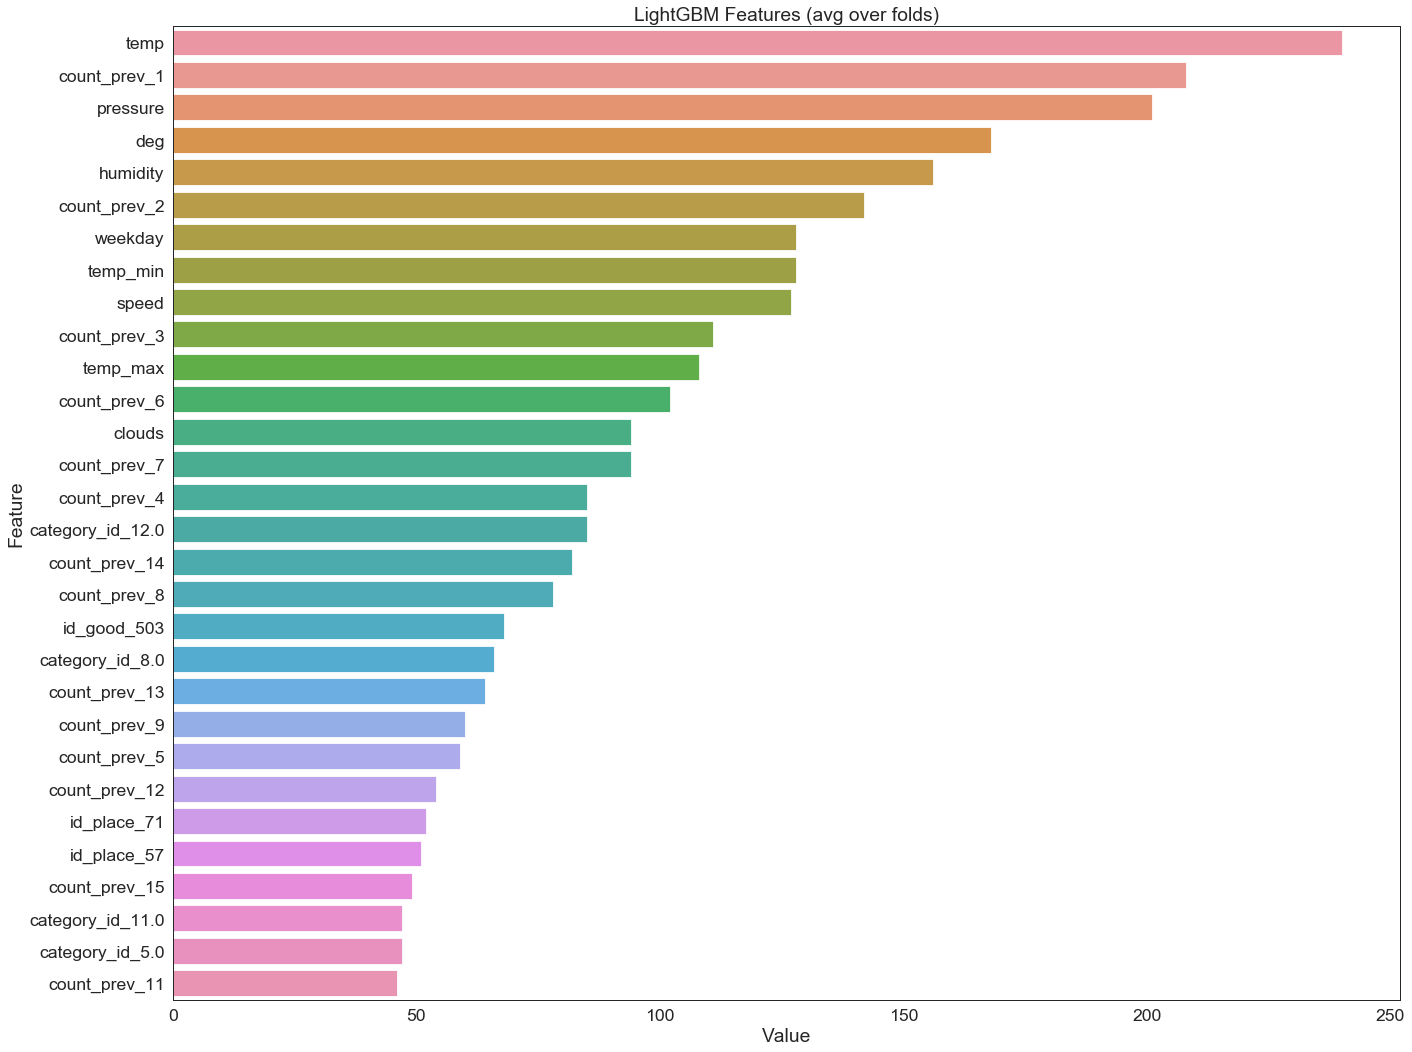

In [16]:
first = 30

sns.set_context("paper", font_scale=2)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(),model.feature_name())), columns=['Value','Feature'])


#feature_imp = feature_imp[~(feature_imp.Feature.isin(['dev_max_turnover']))][:]

#feature_imp = feature_imp[int_columns][:]

feature_imp = feature_imp.tail(first)[:]

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
#plt.savefig('lgbm_importances-01.png')

In [17]:
cnt_predict = model.predict(X_test[interest_columns][:])

In [18]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [19]:
mse(y_test, cnt_predict)

0.148896645363811

Старая метрика 0.14983939163980653

<b>какая решается задача</b>: Задача регресии: предсказание логарифма совершенных покупок

<b>какая для этого используется модель</b>: Использовался градиентный бустинг при помощи LGBM

<b>что есть таргет предсказания для модели</b>: логарифм совершенных покупок

<b>какой функционал ошибки минимизируется</b>: MSE - среднеквадратичная ошибка

<b>какая итоговая метрика качества оценивается</b>: для оценки так же используется MSE
